# Weight analysis: PV sparsification

In [1]:
import os
os.chdir('../')

In [2]:
from utils import *
from loader import *
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from matplotlib.patches import Patch

logging.disable(logging.CRITICAL)

In [3]:
dataset_type = "low"

path_data = "data-files/"
filename_species_names = "Xu-state-space-names.csv"
path_metadata = "metadata/"

In [4]:
if dataset_type == "low":
    filenames_with = ["Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.0075-date_27Nov2024-hour_21h39_Tr32tscaleFull_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.001-date_16Jan2025-hour_17h33_Tr33b_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.0025-date_17Jan2025-hour_14h12_Tr33d_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.01-date_20Feb2025-hour_19h30_Tr35ab_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.005-date_24Feb2025-hour_15h31_Tr35ac_s"]
    print("with scaling layer")

    filenames_without = ["Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.001-date_07Nov2024-hour_18h32_Tr32g_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.001-date_21Nov2024-hour_15h41_Tr32k_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.01-date_20Feb2025-hour_19h27_Tr35abW_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.0075-date_21Feb2025-hour_17h37_Tr32tFullW_s",
                 "Xu-AE-opt_RMSprop-epo_100000-lr_0.005-date_24Feb2025-hour_15h32_Tr35acW_s"]
    print("without scaling layer")

    nbr_seeds = 10

elif dataset_type == "autoignition":
    filenames_with_0D = ["Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h22_Tr0D-2p_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_10h41_Tr0D-2r_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_10h50_Tr0D-2s_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_11h18_Tr0D-2t_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_24Mar2025-hour_11h16_Tr0D-2u_s"]
    print("with scaling layer")
    
    filenames_without_0D = ["Xu-AE-opt_adam-epo_100000-lr_0.025-date_23Mar2025-hour_11h00_Tr0D-2pW_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_22Mar2025-hour_23h09_Tr0D-2qW_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h55_Tr0D-2rW_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h57_Tr0D-2sW_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h52_Tr0D-2tW_s",
                 "Xu-AE-opt_adam-epo_100000-lr_0.025-date_25Mar2025-hour_09h54_Tr0D-2uW_s"]
    print("without scaling layer")

with scaling layer
without scaling layer


## Combine without and with scaling layer (split scaling and encoder)

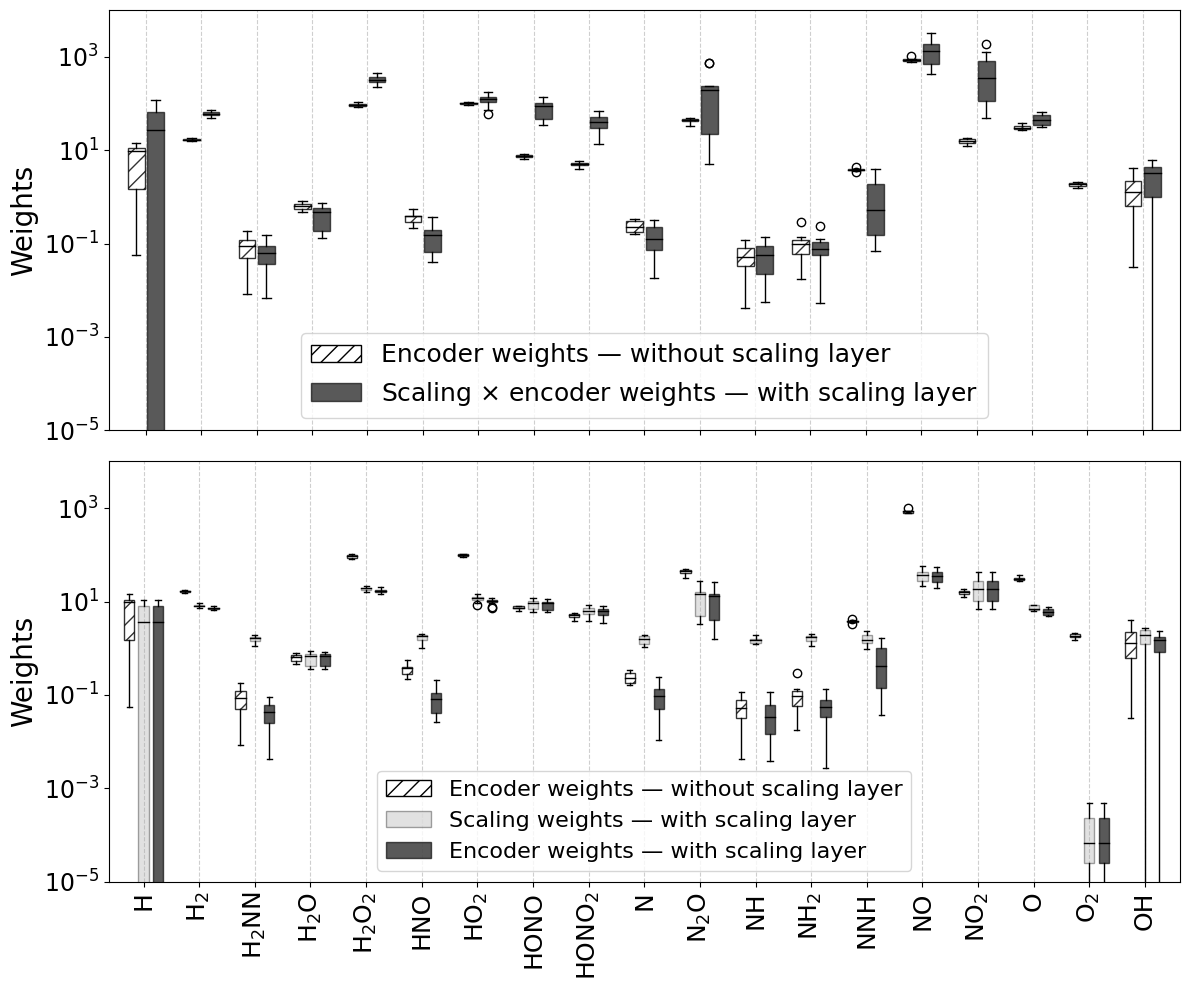

In [8]:
save = True
pathSave = "C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/Weight analysis/DNS-flamelet/"
name = "Combine total encoder weights and weights with split - Tr35a vs Tr35aW"
num_seeds = 10
species_weights_1 = {}  # First model set
species_weights_2 = {}  # Second model set

for seed in range(num_seeds):
    # --- First model ---
    filename_model_1 = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s{seed}"
    filename_metadata_1 = filename_model_1 + "_metadata.pkl"
    loader1 = loadData(filename_species_names, path_metadata, filename_metadata_1)
    idx_species_removed1 = loader1.metadata["idx species removed"]
    model1 = loader1.loadModel()
    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species_1 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed1]
    weights1 = np.abs(model1.get_total_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species_1, weights1):
        species_weights_1.setdefault(sp, []).append(w)

    # --- Second model ---
    filename_model_2 = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s{seed}"
    filename_metadata_2 = filename_model_2 + "_metadata.pkl"
    loader2 = loadData(filename_species_names, path_metadata, filename_metadata_2)
    idx_species_removed2 = loader2.metadata["idx species removed"]
    model2 = loader2.loadModel()
    list_input_species_2 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed2]
    weights2 = np.abs(model2.get_total_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species_2, weights2):
        species_weights_2.setdefault(sp, []).append(w)

# Ensure consistent species order
species_names = sorted(set(species_weights_1.keys()) & set(species_weights_2.keys()))

# Prepare data for grouped boxplots
data1 = [species_weights_1[sp] for sp in species_names]
data2 = [species_weights_2[sp] for sp in species_names]

# Plot side-by-side boxplots
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
axes = axes.flatten()
x = np.arange(len(species_names))
width = 0.35

ax = axes[0]
ax.grid(True, axis = "x", linestyle = "--", alpha = 0.6, zorder = 0)
for i, (vals1, vals2) in enumerate(zip(data1, data2)):
    ax.boxplot(
        vals2,
        positions=[i - width/2],
        widths=0.3, patch_artist=True,
                    boxprops=dict(facecolor='white', alpha=0.8, hatch='//'),
                    medianprops=dict(color='black')
    )
    # With scaling layer - black
    ax.boxplot(
        vals1,
        positions=[i + width/2],
        widths=0.3,
        patch_artist=True,
                    boxprops=dict(facecolor='black', alpha=0.65),
                    medianprops=dict(color='black')
    )

species_names_latex = [name.replace("2", "$_2$") for name in species_names]

ax.set_xticks(x, species_names_latex, rotation=90, fontsize = 20)
ax.set_xticklabels([])
ax.set_ylabel("Weights", fontsize = 20)
ax.set_yscale("log")
ax.set_ylim([10**-5, 10000])
ax.tick_params(axis='y', labelsize=17)
handles = [
    Patch(facecolor='white', hatch='//', edgecolor='black', label='Encoder weights \u2014 without scaling layer'),
    Patch(facecolor='black', alpha=0.65, edgecolor='black', label=r'Scaling $\times$ encoder weights' + ' \u2014 with scaling layer')
]

labels = ['Encoder weights \u2014 without scaling layer', r'Scaling $\times$ encoder weights' + ' \u2014 with scaling layer']

# Add legend to the figure (not tied to any subplot)
ax.legend(handles, labels, ncol=1, fontsize=18)


ax = axes[1]

num_seeds = 10
scaling_weights_dict = {}
encoder_weights_dict = {}
species_weights_no_scaling = {}

# --- Collect data for WITH scaling layer (Tr35a) ---
for seed in range(num_seeds):
    filename_model = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_28Jan2025-hour_17h43_Tr35a_s{seed}"
    filename_metadata = filename_model + "_metadata.pkl"

    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["idx species removed"]
    model = loader.loadModel()

    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed]

    scaling_weights = np.abs(model.get_scaling_weights().numpy().flatten())
    encoder_weights = np.abs(model.get_encoder_weights().numpy().flatten())

    for sp, sw, ew in zip(list_input_species, scaling_weights, encoder_weights):
        scaling_weights_dict.setdefault(sp, []).append(sw)
        encoder_weights_dict.setdefault(sp, []).append(ew)

# --- Collect data for WITHOUT scaling layer (Tr35aW) ---
for seed in range(num_seeds):
    filename_model = f"Xu-AE-opt_RMSprop-epo_100000-lr_0.025-date_19Feb2025-hour_18h31_Tr35aW_s{seed}"
    filename_metadata = filename_model + "_metadata.pkl"

    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["idx species removed"]
    model = loader.loadModel()

    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed]

    weights = np.abs(model.get_total_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species, weights):
        species_weights_no_scaling.setdefault(sp, []).append(w)

# --- Ensure consistent species order ---
species_names = sorted(set(scaling_weights_dict.keys()) &
                       set(encoder_weights_dict.keys()) &
                       set(species_weights_no_scaling.keys()))

# --- Plot ---
ax.grid(True, axis = "x", linestyle = "--", alpha = 0.6, zorder = 0)
positions = []
labels = []
gap = 0.3  # spacing between species
width = 0.25

for i, sp in enumerate(species_names):
    base_pos = i * (1.05 + gap)
    pos_total = base_pos
    pos_scaling = base_pos + 0.35
    pos_encoder = base_pos + 0.7
    
    # Total encoder weights (Tr35aW)
    ax.boxplot(
        species_weights_no_scaling[sp], positions=[pos_total],
        widths=width, patch_artist=True,
        boxprops=dict(facecolor='white', alpha=0.8, hatch='//'),
        medianprops=dict(color='black')
    )
    # Scaling weights (Tr35a)
    ax.boxplot(
        scaling_weights_dict[sp], positions=[pos_scaling],
        widths=width, patch_artist=True,
        boxprops=dict(facecolor='darkgrey', alpha=0.35),
        medianprops=dict(color='black')
    )
    # Encoder weights (Tr35a)
    ax.boxplot(
        encoder_weights_dict[sp], positions=[pos_encoder],
        widths=width, patch_artist=True,
        boxprops=dict(facecolor='black', alpha=0.65),
        medianprops=dict(color='black')
    )

    # Centered tick position
    positions.append((pos_scaling + pos_encoder + pos_total) / 3)
    labels.append(sp)

species_names_latex = [name.replace("2", "$_2$") for name in species_names]

ax.set_xticks(positions, species_names_latex, rotation=90, fontsize=18)
ax.set_ylabel("Weights", fontsize=20)
ax.set_yscale("log")
ax.set_ylim([1e-5, 1e4])
ax.tick_params(axis='y', labelsize=17)


# Legend
# handles = [
#     mlines.Line2D([0], [0], color='white', lw=6, linestyle='--'),
#     mlines.Line2D([0], [0], color='darkgrey', lw=6, alpha=0.5),
#     mlines.Line2D([0], [0], color='black', lw=6)
# ]

handles = [
    Patch(facecolor='white', hatch='//', edgecolor='black', label='Encoder weights \u2014 without scaling layer'),
    Patch(facecolor='darkgrey', alpha=0.35, edgecolor='black', label='Scaling weights \u2014 with scaling layer'),
    Patch(facecolor='black', alpha=0.65, edgecolor='black', label='Encoder weights \u2014 with scaling layer')
]
labels = ['Encoder weights \u2014 without scaling layer', 'Scaling weights \u2014 with scaling layer', 'Encoder weights \u2014 with scaling layer']

ax.legend(handles, labels, loc = "lower center", ncol=1, fontsize=16)
plt.tight_layout()

if save:
    plt.savefig(pathSave + name + ".png", dpi=1000, bbox_inches="tight")
    plt.savefig(pathSave + name + ".pdf", bbox_inches="tight")

plt.show()


### Plot all weights from all trainings

## Same analysis for the autoignition

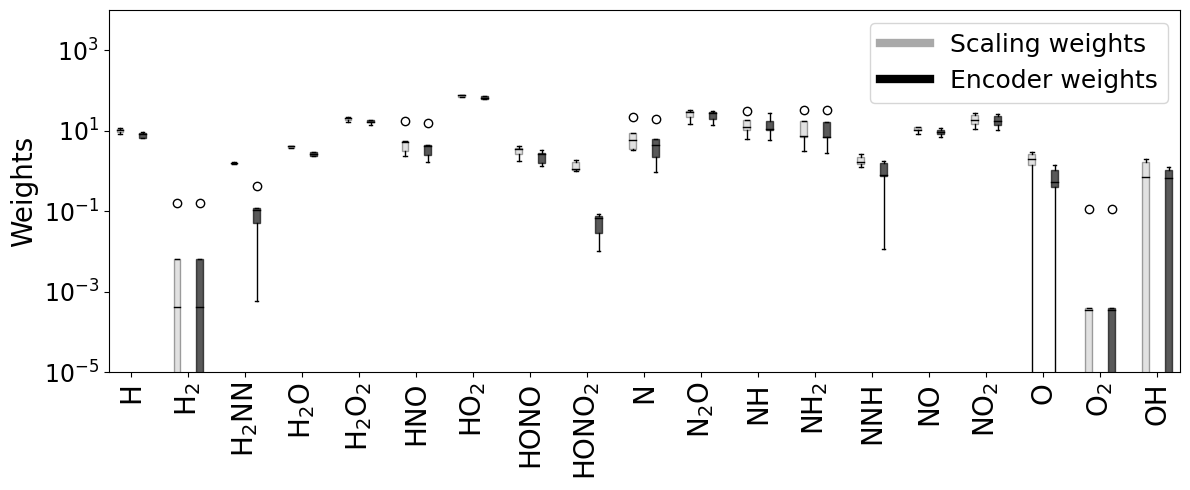

In [9]:
save = False
pathSave = "C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/Weight analysis/autoignition/"
name = "scaling vs encoder weights - Tr0D-2q"

num_seeds = 5
scaling_weights_dict = {}   # species_name -> list of scaling weights across seeds
encoder_weights_dict = {}   # species_name -> list of encoder weights across seeds

for seed in range(num_seeds):
    filename_model = f"Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s{seed}"
    filename_metadata = filename_model + "_metadata.pkl"
    
    loader = loadData(filename_species_names, path_metadata, filename_metadata)
    idx_species_removed = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
    model = loader.loadModel()
    
    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed]
    
    # Get model weights separately
    scaling_weights = np.abs(model.get_scaling_weights().numpy().flatten())
    encoder_weights = np.abs(model.get_encoder_weights().numpy().flatten())

    # Collect weights for each species
    for sp_name, sw, ew in zip(list_input_species, scaling_weights, encoder_weights):
        scaling_weights_dict.setdefault(sp_name, []).append(sw)
        encoder_weights_dict.setdefault(sp_name, []).append(ew)

# Prepare sorted species list
species_names = sorted(set(scaling_weights_dict.keys()) & set(encoder_weights_dict.keys()))

# Plot two side-by-side boxplots for each species
plt.figure(figsize=(12, 5))
positions = []
labels = []
gap = 0.5

for i, sp in enumerate(species_names):
    base_pos = i * 2 + i * gap
    pos_scaling = base_pos
    pos_encoder = base_pos + 1
    plt.boxplot(
        scaling_weights_dict[sp], positions=[pos_scaling],
        widths=0.3, patch_artist=True,
                    boxprops=dict(facecolor='darkgrey', alpha=0.35),
                    medianprops=dict(color='black')
    )
    # Encoder weights
    plt.boxplot(
        encoder_weights_dict[sp], positions=[pos_encoder],
        widths=0.3,
        patch_artist=True,
                    boxprops=dict(facecolor='black', alpha=0.65),
                    medianprops=dict(color='black')
    )

    positions.append((pos_scaling + pos_encoder) / 2)
    labels.append(sp)

species_names_latex = [name.replace("2", "$_2$") for name in species_names]


plt.ylabel("Weights", fontsize = 20)
plt.yscale("log")
plt.ylim([10**-5, 10000])
plt.yticks(fontsize = 17)
plt.xticks(positions, species_names_latex, rotation=90, fontsize=20)
handles = [
    mlines.Line2D([0], [0], color='darkgrey', lw=6),
    mlines.Line2D([0], [0], color='black', lw=6)
]

labels = ['Scaling weights', 'Encoder weights']

# Add legend to the figure (not tied to any subplot)
plt.legend(handles, labels, ncol=1, fontsize=18)
plt.tight_layout()
if save:
    plt.savefig(pathSave + name + ".png", dpi = 1000, bbox_inches = "tight")
    plt.savefig(pathSave + name + ".pdf", bbox_inches = "tight")
plt.show()

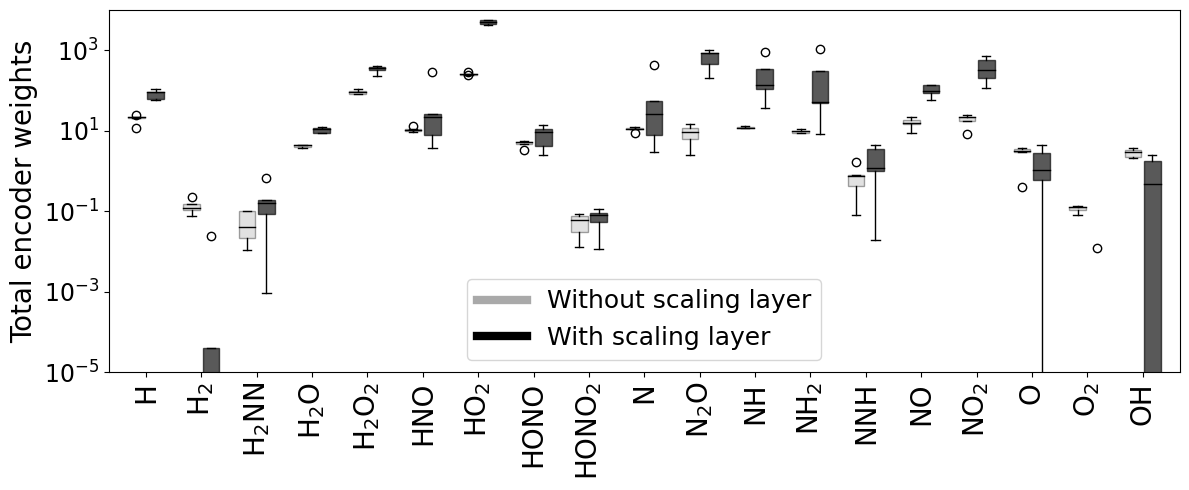

In [10]:
save = False
pathSave = "C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/Weight analysis/autoignition/"
name = "Total encoder weights - Tr0D-2q vs Tr0D-2qW"

num_seeds = 5
species_weights_1 = {}  # First model set
species_weights_2 = {}  # Second model set

for seed in range(num_seeds):
    # --- First model ---
    filename_model_1 = f"Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s{seed}"
    filename_metadata_1 = filename_model_1 + "_metadata.pkl"
    loader1 = loadData(filename_species_names, path_metadata, filename_metadata_1)
    idx_species_removed1 = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
    model1 = loader1.loadModel()
    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species_1 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed1]
    weights1 = np.abs(model1.get_total_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species_1, weights1):
        species_weights_1.setdefault(sp, []).append(w)

    # --- Second model ---
    filename_model_2 = f"Xu-AE-opt_adam-epo_100000-lr_0.025-date_22Mar2025-hour_23h09_Tr0D-2qW_s{seed}"
    filename_metadata_2 = filename_model_2 + "_metadata.pkl"
    loader2 = loadData(filename_species_names, path_metadata, filename_metadata_2)
    idx_species_removed2 = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
    model2 = loader2.loadModel()
    list_input_species_2 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed2]
    weights2 = np.abs(model2.get_total_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species_2, weights2):
        species_weights_2.setdefault(sp, []).append(w)

# Ensure consistent species order
species_names = sorted(set(species_weights_1.keys()) & set(species_weights_2.keys()))

# Prepare data for grouped boxplots
data1 = [species_weights_1[sp] for sp in species_names]
data2 = [species_weights_2[sp] for sp in species_names]

# Plot side-by-side boxplots
plt.figure(figsize=(12, 5))
x = np.arange(len(species_names))
width = 0.35

for i, (vals1, vals2) in enumerate(zip(data1, data2)):
    plt.boxplot(
        vals2,
        positions=[i - width/2],
        widths=0.3, patch_artist=True,
                    boxprops=dict(facecolor='darkgrey', alpha=0.35),
                    medianprops=dict(color='black')
    )
    # With scaling layer - black
    plt.boxplot(
        vals1,
        positions=[i + width/2],
        widths=0.3,
        patch_artist=True,
                    boxprops=dict(facecolor='black', alpha=0.65),
                    medianprops=dict(color='black')
    )

species_names_latex = [name.replace("2", "$_2$") for name in species_names]

plt.xticks(x, species_names_latex, rotation=90, fontsize = 20)
plt.ylabel("Total encoder weights", fontsize = 20)
plt.yscale("log")
plt.ylim([10**-5, 10000])
plt.yticks(fontsize = 17)
handles = [
    mlines.Line2D([0], [0], color='darkgrey', lw=6),
    mlines.Line2D([0], [0], color='black', lw=6)
]

labels = ['Without scaling layer', 'With scaling layer']

# Add legend to the figure (not tied to any subplot)
plt.legend(handles, labels, ncol=1, fontsize=18)
plt.tight_layout()
if save:
    plt.savefig(pathSave + name + ".png", dpi = 1000, bbox_inches = "tight")
    plt.savefig(pathSave + name + ".pdf", bbox_inches = "tight")
plt.show()


[1.05459315e-01 1.39041900e+01 2.34373968e+00 6.38406760e-03
 2.55909680e+00 6.30245793e+01 6.85808834e-02 2.65224268e+00
 6.73734934e+00 1.35547412e+01 6.94972406e+00 1.03423241e+01
 7.93181297e-01 1.70470262e+01 8.43650792e+00 2.17514136e+00
 2.52211672e-30 1.08391250e+00 5.32288812e-01]
[6.07729983e-04 1.64212518e+01 2.64739434e+00 2.38494322e-10
 1.59559783e+01 6.31007634e+01 1.03303338e-02 1.56520688e+00
 8.23889510e+00 2.01448802e+01 3.20594269e+01 2.80255026e+01
 1.17344315e-02 1.37949092e+01 1.15009236e+01 1.94127879e+01
 6.99946972e-13 1.27205802e+00 1.44470362e+00]
[5.17447188e-02 1.87736055e+01 2.99024889e+00 1.57956329e-01
 1.63271172e+00 7.31767573e+01 8.60946024e-02 2.86722708e+00
 9.28335518e+00 2.85241898e+01 2.77446958e+00 5.82825326e+00
 7.61118815e-01 2.65845224e+01 1.05974437e+01 9.25408061e-01
 1.10855446e-01 6.72462161e-01 1.05785282e+00]
[4.14248783e-01 1.66390146e+01 2.32790543e+00 4.07675968e-04
 4.52946431e+00 6.37818725e+01 2.83876709e-02 1.34376662e+00
 6.72

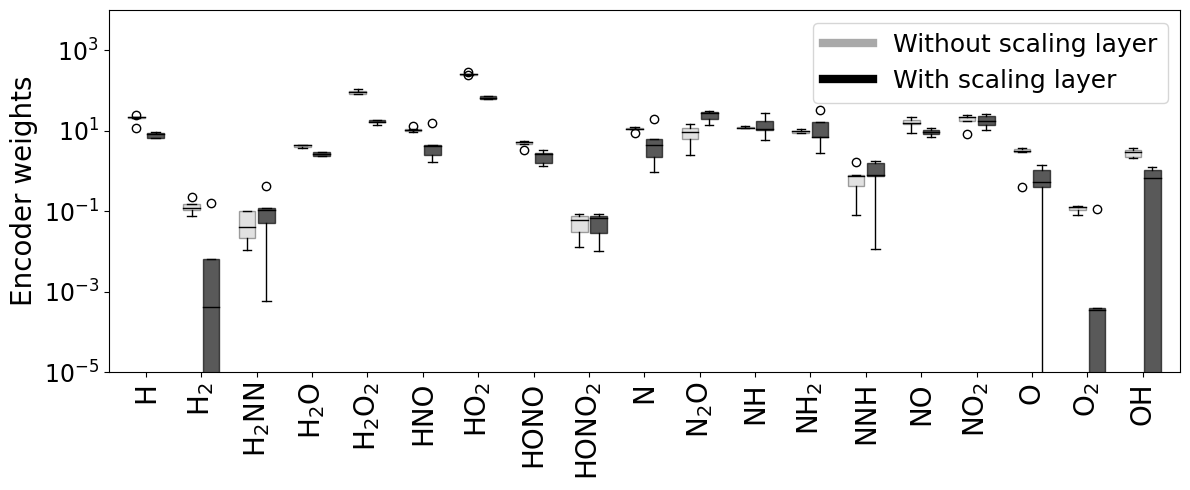

In [11]:
save = False
pathSave = "C:/Users/Admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect of scaling/Weights/Weight analysis/autoignition/"
name = "Encoder weights - Tr0D-2q vs Tr0D-2qW"

num_seeds = 5
species_weights_1 = {}  # First model set
species_weights_2 = {}  # Second model set

for seed in range(num_seeds):
    # --- First model ---
    filename_model_1 = f"Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s{seed}"
    filename_metadata_1 = filename_model_1 + "_metadata.pkl"
    loader1 = loadData(filename_species_names, path_metadata, filename_metadata_1)
    idx_species_removed1 = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
    model1 = loader1.loadModel()
    species_obj = Species(path_data)
    list_all_species = species_obj.get_list_species()
    list_input_species_1 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed1]
    weights1 = np.abs(model1.get_encoder_weights().numpy().flatten())
    print(weights1)
    for sp, w in zip(list_input_species_1, weights1):
        species_weights_1.setdefault(sp, []).append(w)

    # --- Second model ---
    filename_model_2 = f"Xu-AE-opt_adam-epo_100000-lr_0.025-date_22Mar2025-hour_23h09_Tr0D-2qW_s{seed}"
    filename_metadata_2 = filename_model_2 + "_metadata.pkl"
    loader2 = loadData(filename_species_names, path_metadata, filename_metadata_2)
    idx_species_removed2 = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
    model2 = loader2.loadModel()
    list_input_species_2 = [item for idx, item in enumerate(list_all_species) if idx not in idx_species_removed2]
    weights2 = np.abs(model2.get_encoder_weights().numpy().flatten())
    for sp, w in zip(list_input_species_2, weights2):
        species_weights_2.setdefault(sp, []).append(w)

# Ensure consistent species order
species_names = sorted(set(species_weights_1.keys()) & set(species_weights_2.keys()))

# Prepare data for grouped boxplots
data1 = [species_weights_1[sp] for sp in species_names]
data2 = [species_weights_2[sp] for sp in species_names]

# Plot side-by-side boxplots
plt.figure(figsize=(12, 5))
x = np.arange(len(species_names))
width = 0.35

for i, (vals1, vals2) in enumerate(zip(data1, data2)):
    plt.boxplot(
        vals2,
        positions=[i - width/2],
        widths=0.3, patch_artist=True,
                    boxprops=dict(facecolor='darkgrey', alpha=0.35),
                    medianprops=dict(color='black')
    )
    # With scaling layer - black
    plt.boxplot(
        vals1,
        positions=[i + width/2],
        widths=0.3,
        patch_artist=True,
                    boxprops=dict(facecolor='black', alpha=0.65),
                    medianprops=dict(color='black')
    )

species_names_latex = [name.replace("2", "$_2$") for name in species_names]

plt.xticks(x, species_names_latex, rotation=90, fontsize = 20)
plt.ylabel("Encoder weights", fontsize = 20)
plt.yscale("log")
plt.ylim([10**-5, 10000])
plt.yticks(fontsize = 17)
handles = [
    mlines.Line2D([0], [0], color='darkgrey', lw=6),
    mlines.Line2D([0], [0], color='black', lw=6)
]

labels = ['Without scaling layer', 'With scaling layer']

# Add legend to the figure (not tied to any subplot)
plt.legend(handles, labels, ncol=1, fontsize=18)
plt.tight_layout()
if save:
    plt.savefig(pathSave + name + ".png", dpi = 1000, bbox_inches = "tight")
    plt.savefig(pathSave + name + ".pdf", bbox_inches = "tight")
plt.show()